# Keras - MNIST dataset

### Importing the libraries

In [67]:
import tensorflow as tf
print(tf.__version__)
from tensorflow import keras
import pandas as pd
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

2.4.0


### Basis EDA on dataset

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print("The shape of x_train is",x_train.shape)
print("The shape of y_train is",y_train.shape)
print("The shape of x_test is",x_test.shape)
print("The shape of y_train is",y_test.shape)

11493376/11490434 [==============================] - 8s 1us/step
The shape of x_train is (60000, 28, 28)
The shape of y_train is (60000,)
The shape of x_test is (10000, 28, 28)
The shape of y_train is (10000,)


In [6]:
print("The dtype of x_train is",type(x_train))
print("The dtype of y_train is",type(y_train))
print("The dtype of x_test is",type(x_test))
print("The dtype of y_train is",type(y_test))

The dtype of x_train is <class 'numpy.ndarray'>
The dtype of y_train is <class 'numpy.ndarray'>
The dtype of x_test is <class 'numpy.ndarray'>
The dtype of y_train is <class 'numpy.ndarray'>


In [24]:
print("Number of training examples :", x_train.shape[0], "and each image is of shape (", x_train.shape[1],",",x_train.shape[2],")")
print("Number of training examples :", x_test.shape[0], "and each image is of shape (", x_test.shape[1],",",x_test.shape[2],")")

Number of training examples : 60000 and each image is of shape ( 28 , 28 )
Number of training examples : 10000 and each image is of shape ( 28 , 28 )


### Preprocessing of data

In [25]:
# The input shape its 2 dimensional vector for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784

x_train = x_train.reshape((x_train.shape[0], x_train.shape[1]*x_train.shape[2]))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1]*x_test.shape[2]))
print("The reshape of x_train is",x_train.shape)
print("The reshape of x_test is",x_test.shape)

The reshape of x_train is (60000, 784)
The reshape of x_test is (10000, 784)


In [51]:
y_train1 = keras.utils.to_categorical(y_train)
y_test1 = keras.utils.to_categorical(y_test)

print("The reshape of y_train is",y_train1.shape)
print("The reshape of y_test is",y_test1.shape)

The reshape of y_train is (60000, 10)
The reshape of y_test is (10000, 10)


## Modelling

### 1. Input(784) -- Output(10, Softmax)

### Parameters :-
1. He_nomalization
2. Adam optimizer
3. Cross_entropy loss

In [69]:
model = Sequential()
model.add(Dense(units = 10, activation='softmax', use_bias = True, input_dim = 784, \
                kernel_initializer=tf.keras.initializers.he_normal(), bias_initializer=tf.keras.initializers.random_normal()))

In [70]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss = tf.keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [71]:
history = model.fit(x= x_train, y= y_train1, batch_size=128, epochs=10, validation_data=(x_test, y_test1))

Epoch 1/10
469/469 [==============================] - 3s 5ms/step - loss: 26.0145 - accuracy: 0.6888 - val_loss: 5.6294 - val_accuracy: 0.8727
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 5.0021 - accuracy: 0.8754 - val_loss: 5.1915 - val_accuracy: 0.8572
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 4.0522 - accuracy: 0.8798 - val_loss: 3.9586 - val_accuracy: 0.8877
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 3.4470 - accuracy: 0.8903 - val_loss: 4.1015 - val_accuracy: 0.8834
Epoch 5/10
469/469 [==============================] - 2s 3ms/step - loss: 3.2715 - accuracy: 0.8873 - val_loss: 3.6717 - val_accuracy: 0.8821
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 2.9066 - accuracy: 0.8937 - val_loss: 3.3708 - val_accuracy: 0.8905
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 2.8458 - accuracy: 0.8933 - val_loss: 3.6073 - val_accuracy: 0.8710
Epoch

In [74]:
score= model.evaluate(x_test, y_test1, verbose=0)
#it returns loss value and metric value
print("Accuracy of the model on test data is:",score[1])

Accuracy of the model on test data is: 0.8985000252723694


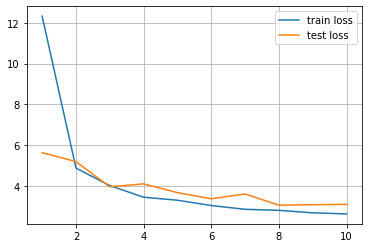

In [76]:
train_loss = history.history['loss']
test_loss = history.history['val_loss']
import matplotlib.pyplot as plt
plt.grid(True)
plt.plot(range(1,11), train_loss, label="train loss")
plt.plot(range(1,11), test_loss, label="test loss")
plt.legend()
plt.show()

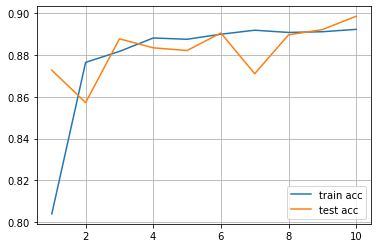

In [78]:
train_accuracy = history.history['accuracy']
test_accuracy = history.history['val_accuracy']
import matplotlib.pyplot as plt
plt.grid(True)
plt.plot(range(1,11), train_accuracy, label="train acc")
plt.plot(range(1,11), test_accuracy, label="test acc")
plt.legend()
plt.show()

### 2.  Input(784) ---Layer1(1024, Relu)---Layer2(512, Relu)---Layer3(128,  Relu)---Output(10, Softmax)

### Parameters :-
1. He_nomalization
2. Adam optimizer
3. Cross_entropy loss

In [81]:
model = Sequential()
model.add(Dense(1024, activation='relu', input_dim= 784, kernel_initializer='he_normal', use_bias= True, \
                bias_initializer= tf.keras.initializers.random_normal()))
model.add(Dense(512, activation='relu', kernel_initializer='he_normal', use_bias=True))
model.add(Dense(128, activation='relu', kernel_initializer='he_normal', use_bias=True))
model.add(Dense(10, activation='softmax', kernel_initializer='he_normal', use_bias=True))

In [82]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1024)              803840    
_________________________________________________________________
dense_8 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_9 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1290      
Total params: 1,395,594
Trainable params: 1,395,594
Non-trainable params: 0
_________________________________________________________________


In [83]:
model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy'])

In [84]:
model.fit(x=x_train, y=y_train1, batch_size=128, epochs=10, validation_data=(x_test, y_test1))

Epoch 1/10
469/469 [==============================] - 28s 58ms/step - loss: 13.8157 - accuracy: 0.8344 - val_loss: 0.5825 - val_accuracy: 0.9367
Epoch 2/10
469/469 [==============================] - 25s 53ms/step - loss: 0.3796 - accuracy: 0.9525 - val_loss: 0.3142 - val_accuracy: 0.9552
Epoch 3/10
469/469 [==============================] - 27s 58ms/step - loss: 0.1571 - accuracy: 0.9713 - val_loss: 0.3136 - val_accuracy: 0.9611
Epoch 4/10
469/469 [==============================] - 26s 55ms/step - loss: 0.1081 - accuracy: 0.9796 - val_loss: 0.3740 - val_accuracy: 0.9537
Epoch 5/10
469/469 [==============================] - 27s 57ms/step - loss: 0.1126 - accuracy: 0.9780 - val_loss: 0.3270 - val_accuracy: 0.9516
Epoch 6/10
469/469 [==============================] - 27s 58ms/step - loss: 0.0965 - accuracy: 0.9803 - val_loss: 0.2731 - val_accuracy: 0.9580
Epoch 7/10
469/469 [==============================] - 26s 56ms/step - loss: 0.0904 - accuracy: 0.9812 - val_loss: 0.2232 - val_accuracy

In [101]:
score= model.evaluate(x_test, y_test1, verbose=0)
#it returns loss value and metric value
print("Accuracy of the model on test data is:",score[1])

Accuracy of the model on test data is: 0.967199981212616


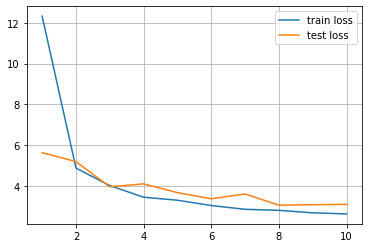

In [102]:
train_loss = history.history['loss']
test_loss = history.history['val_loss']
import matplotlib.pyplot as plt
plt.grid(True)
plt.plot(range(1,11), train_loss, label="train loss")
plt.plot(range(1,11), test_loss, label="test loss")
plt.legend()
plt.show()

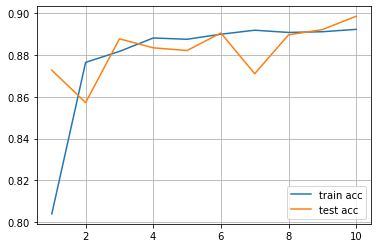

In [103]:
train_accuracy = history.history['accuracy']
test_accuracy = history.history['val_accuracy']
import matplotlib.pyplot as plt
plt.grid(True)
plt.plot(range(1,11), train_accuracy, label="train acc")
plt.plot(range(1,11), test_accuracy, label="test acc")
plt.legend()
plt.show()

#### Plotting weights of model after model build

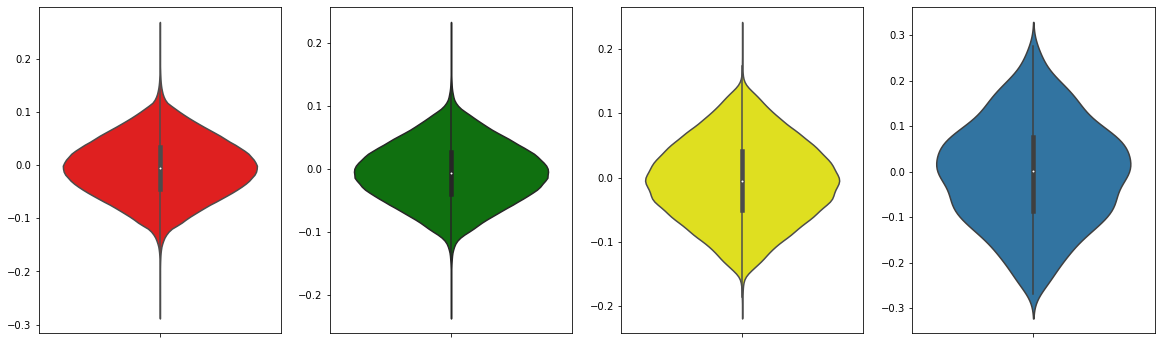

In [104]:
layer1_wt = model.get_weights()[0].ravel()
layer2_wt = model.get_weights()[2].ravel()
layer3_wt = model.get_weights()[4].ravel()
layer4_wt = model.get_weights()[6].ravel()

plt.figure(num = 1, figsize=(20,6))

plt.subplot(141)
sns.violinplot(y= layer1_wt, color='red')

plt.subplot(142)
sns.violinplot(y= layer2_wt, color= 'green')

plt.subplot(143)
sns.violinplot(y= layer3_wt, color= 'yellow')

plt.subplot(144)
sns.violinplot(y= layer4_wt)

plt.show()

### 3. Input(784) - BatchNormalization() - Dropout(0.2) - Layer1(1024, Relu) - BatchNormalization() - Dropout(0.2) -Layer2(512, Relu) -BatchNormalization() - Dropout(0.2) - Layer3(128,  Relu) - BatchNormalization() - Dropout(0.2) -Output(10, Softmax)

### Parameters :-
1. He_nomalization
2. Adam optimizer
3. Cross_entropy loss

#This model includes Dropout as well as BatchNormalization layer also.

In [108]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

In [158]:
model = Sequential()

model.add(Dense(1024, activation='sigmoid', input_dim = 784, use_bias=True, kernel_initializer='he_normal',\
               bias_initializer= tf.keras.initializers.random_normal()))
model.add(BatchNormalization())
model.add(Dropout(rate=0.2))

model.add(Dense(512, activation='sigmoid',use_bias=True, kernel_initializer='he_normal',\
               bias_initializer= tf.keras.initializers.random_normal()))
model.add(BatchNormalization())
model.add(Dropout(rate=0.2))

model.add(Dense(128, activation='sigmoid',use_bias=True, kernel_initializer='he_normal',\
               bias_initializer= tf.keras.initializers.random_normal()))
model.add(BatchNormalization()) #Using BatchNormalization layer at the end
model.add(Dropout(rate=0.2))

model.add(Dense(10, activation='softmax',use_bias=True, kernel_initializer='he_normal',
               bias_initializer= tf.keras.initializers.random_normal()))

In [154]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 1024)              803840    
_________________________________________________________________
batch_normalization_22 (Batc (None, 1024)              4096      
_________________________________________________________________
dropout_32 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_48 (Dense)             (None, 512)               524800    
_________________________________________________________________
batch_normalization_23 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_33 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_49 (Dense)             (None, 128)             

In [171]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [173]:
model.fit(x_train, y_train1, batch_size=128, epochs=10, validation_split=0.1, workers=-1, shuffle=True, verbose=2)

Epoch 1/10
422/422 [==============================] - 29s 69ms/step - loss: 0.2507 - accuracy: 0.9223 - val_loss: 0.1793 - val_accuracy: 0.9482
Epoch 2/10
422/422 [==============================] - 29s 70ms/step - loss: 0.2385 - accuracy: 0.9252 - val_loss: 0.1700 - val_accuracy: 0.9482
Epoch 3/10
422/422 [==============================] - 28s 66ms/step - loss: 0.2342 - accuracy: 0.9268 - val_loss: 0.1492 - val_accuracy: 0.9535
Epoch 4/10
422/422 [==============================] - 28s 66ms/step - loss: 0.2229 - accuracy: 0.9299 - val_loss: 0.1674 - val_accuracy: 0.9505
Epoch 5/10
422/422 [==============================] - 28s 66ms/step - loss: 0.2090 - accuracy: 0.9344 - val_loss: 0.1285 - val_accuracy: 0.9613
Epoch 6/10
422/422 [==============================] - 28s 66ms/step - loss: 0.2102 - accuracy: 0.9328 - val_loss: 0.1634 - val_accuracy: 0.9515
Epoch 7/10
422/422 [==============================] - 28s 66ms/step - loss: 0.1942 - accuracy: 0.9381 - val_loss: 0.1204 - val_accuracy:

In [174]:
score= model.evaluate(x_test, y_test1, verbose=0)
#it returns loss value and metric value
print("Accuracy of the model on test data is:",score[1])

Accuracy of the model on test data is: 0.9567000269889832


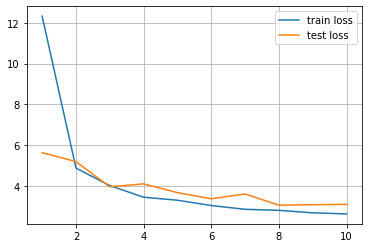

In [175]:
train_loss = history.history['loss']
test_loss = history.history['val_loss']
import matplotlib.pyplot as plt
plt.grid(True)
plt.plot(range(1,11), train_loss, label="train loss")
plt.plot(range(1,11), test_loss, label="test loss")
plt.legend()
plt.show()

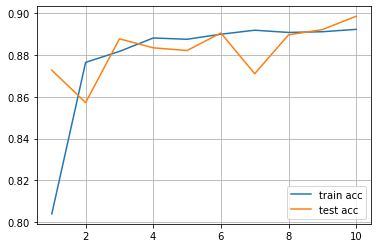

In [176]:
train_accuracy = history.history['accuracy']
test_accuracy = history.history['val_accuracy']
import matplotlib.pyplot as plt
plt.grid(True)
plt.plot(range(1,11), train_accuracy, label="train acc")
plt.plot(range(1,11), test_accuracy, label="test acc")
plt.legend()
plt.show()

### Confusion Matrix for the Model

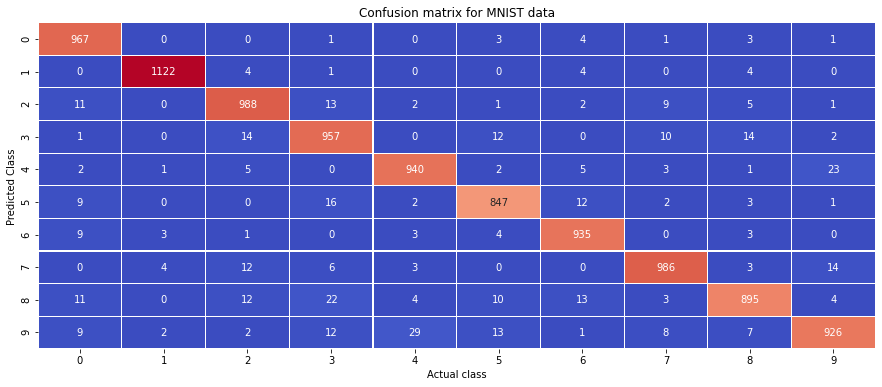

In [282]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(15,6))
#model.predict returns the probabilities values
sns.heatmap(confusion_matrix(y_test, np.argmax(model.predict(x_test), axis=1)), fmt='d', linecolor='white', linewidths=0.2,\
            annot=True, cmap='coolwarm', cbar=False)
plt.title("Confusion matrix for MNIST data")
plt.ylabel("Predicted Class")
plt.xlabel("Actual class")
plt.show()

### Saving the model

In [197]:
#Check first if the file already exists
import os
if os.path.isfile(r"C:\Users\user-pc\AppliedAi\8.0\mine\keras_mnist_model.h5")==False:
    model.save(r"C:\Users\user-pc\AppliedAi\8.0\mine\keras_mnist_model.h5")

This will save the following :
1. The architecture of the model, allowing it to recreate it.
2. The weights of the model.
3. The training configs(optimizer, loss).
4. The state of the model, allowing to resume training from where it is left.

### Loading the model

In [201]:
from tensorflow.keras.models import load_model
model_load = load_model(r"C:\Users\user-pc\AppliedAi\8.0\mine\keras_mnist_model.h5")
model_load.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 1024)              803840    
_________________________________________________________________
batch_normalization_25 (Batc (None, 1024)              4096      
_________________________________________________________________
dropout_35 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_52 (Dense)             (None, 512)               524800    
_________________________________________________________________
batch_normalization_26 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_36 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_53 (Dense)             (None, 128)             

### Model to json

In [221]:
#Saving the architecture/configuration only as a JSON file and not its weights.

import json
json_string = model.to_json()
parsed = json.loads(json_string)
print(json.dumps(parsed, indent=3, sort_keys=True))

{
   "backend": "tensorflow",
   "class_name": "Sequential",
   "config": {
      "layers": [
         {
            "class_name": "InputLayer",
            "config": {
               "batch_input_shape": [
                  null,
                  784
               ],
               "dtype": "float32",
               "name": "dense_51_input",
               "ragged": false,
               "sparse": false
            }
         },
         {
            "class_name": "Dense",
            "config": {
               "activation": "sigmoid",
               "activity_regularizer": null,
               "batch_input_shape": [
                  null,
                  784
               ],
               "bias_constraint": null,
               "bias_initializer": {
                  "class_name": "RandomNormal",
                  "config": {
                     "mean": 0.0,
                     "seed": null,
                     "stddev": 0.05
                  }
               },
         

In [220]:
#Model construction from json

from tensorflow.keras.models import model_from_json

model_from_json = model_from_json(json_string)
model_from_json.summary()
print("="*100)
print(model_from_json.optimizer)

#The weights are not updated as well the we need to compile it to get the optimizer as its returning None for optimizer. 
#Its just saving the architecture

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 1024)              803840    
_________________________________________________________________
batch_normalization_25 (Batc (None, 1024)              4096      
_________________________________________________________________
dropout_35 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_52 (Dense)             (None, 512)               524800    
_________________________________________________________________
batch_normalization_26 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_36 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_53 (Dense)             (None, 128)             

# Tensorboard

1. We can integrate with tensorboard with various callbacks but we have different thing in callbacks too.

https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/TensorBoard

In [247]:
from tensorflow.keras.callbacks import TensorBoard
from time import gmtime, strftime
model_name = "mnist_model_{}".format(strftime("%Y%m%d%H%M%S", gmtime()))

#Saving the logs and creating the tensorboard object.
tensorboard = TensorBoard(log_dir=r'C:\Users\user-pc\Desktop\myrepo2\Mnist_TF\mnist_logs\{}'.format(model_name))

###########################################################################################################################

#training the model

model = Sequential()
model.add(Dense(1024, activation='sigmoid', input_dim = 784, use_bias=True, kernel_initializer='he_normal',\
               bias_initializer= tf.keras.initializers.random_normal()))
model.add(BatchNormalization())
model.add(Dropout(rate=0.2))
model.add(Dense(512, activation='sigmoid',use_bias=True, kernel_initializer='he_normal',\
               bias_initializer= tf.keras.initializers.random_normal()))
model.add(BatchNormalization())
model.add(Dropout(rate=0.2))
model.add(Dense(128, activation='sigmoid',use_bias=True, kernel_initializer='he_normal',\
               bias_initializer= tf.keras.initializers.random_normal()))
model.add(BatchNormalization()) #Using BatchNormalization layer at the end
model.add(Dropout(rate=0.2))
model.add(Dense(10, activation='softmax',use_bias=True, kernel_initializer='he_normal',
               bias_initializer= tf.keras.initializers.random_normal()))


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train1, batch_size=128, epochs=10, validation_split=0.1, workers=-1, shuffle=True, \
              verbose=2, callbacks=[tensorboard])

Epoch 1/10
422/422 - 38s - loss: 0.3883 - accuracy: 0.8797 - val_loss: 0.2625 - val_accuracy: 0.9175
Epoch 2/10
422/422 - 32s - loss: 0.2851 - accuracy: 0.9107 - val_loss: 0.2027 - val_accuracy: 0.9373
Epoch 3/10
422/422 - 33s - loss: 0.2582 - accuracy: 0.9201 - val_loss: 0.1940 - val_accuracy: 0.9398
Epoch 4/10
422/422 - 28s - loss: 0.2471 - accuracy: 0.9228 - val_loss: 0.1965 - val_accuracy: 0.9378
Epoch 5/10
422/422 - 27s - loss: 0.2344 - accuracy: 0.9257 - val_loss: 0.1456 - val_accuracy: 0.9548
Epoch 6/10
422/422 - 26s - loss: 0.2242 - accuracy: 0.9288 - val_loss: 0.1472 - val_accuracy: 0.9570
Epoch 7/10
422/422 - 26s - loss: 0.2113 - accuracy: 0.9354 - val_loss: 0.1346 - val_accuracy: 0.9578
Epoch 8/10
422/422 - 27s - loss: 0.2050 - accuracy: 0.9357 - val_loss: 0.1348 - val_accuracy: 0.9583
Epoch 9/10
422/422 - 25s - loss: 0.2055 - accuracy: 0.9353 - val_loss: 0.1490 - val_accuracy: 0.9538
Epoch 10/10
422/422 - 25s - loss: 0.2019 - accuracy: 0.9366 - val_loss: 0.1253 - val_accura